In [4]:
import pandas as pd


In [5]:
data = pd.read_csv('test_results_memory.csv', index_col=0)
data.head()

,entries,file_size_compressed,file_size_raw,import_speed,memory_usage,open_speed_compressed,open_speed_raw,write_speed_compressed,write_speed_raw
0,5,47136,845609,0.316162,2792515,0.011129,0.015624,0.157119,0.110977
1,10,70097,1691205,0.031419,5571391,0.022116,0.030561,0.323259,0.167768
2,15,104818,2536805,0.017192,8350415,0.032437,0.051045,0.486113,0.325341
3,20,134265,3382405,0.017337,11129159,0.043644,0.062923,0.653821,0.335134
4,25,160870,4228005,0.017613,13908439,0.054837,0.080492,0.794641,0.416627


In [40]:
import matplotlib
import matplotlib.pyplot as plt
font = {'size' : 14, 'weight': "normal"}
matplotlib.rc('font', **font)


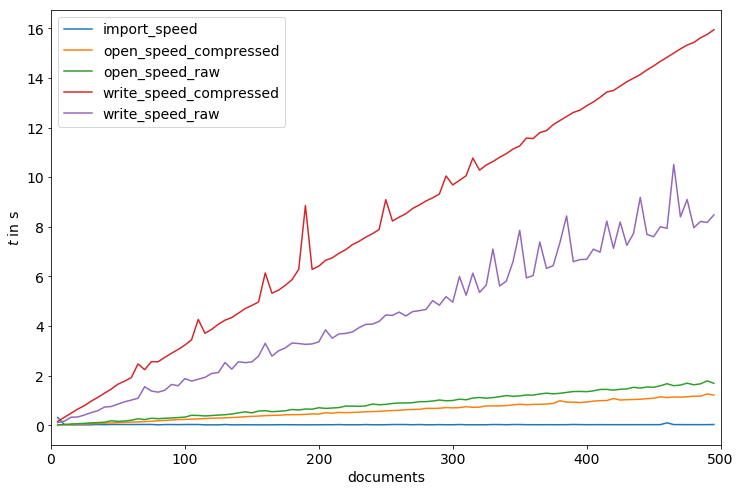

In [48]:
f = plt.figure(figsize=(12,8))
lines = [plt.plot(data["entries"], data[col], label=col) for col in data.columns if col != "entries" and "speed" in col]
plt.legend(loc='best')
plt.ylabel("$t$ in s")
plt.xlabel("documents")
plt.xlim(0, data['entries'].max()+data['entries'].max()*0.01)
plt.savefig('operation_speed.pdf')

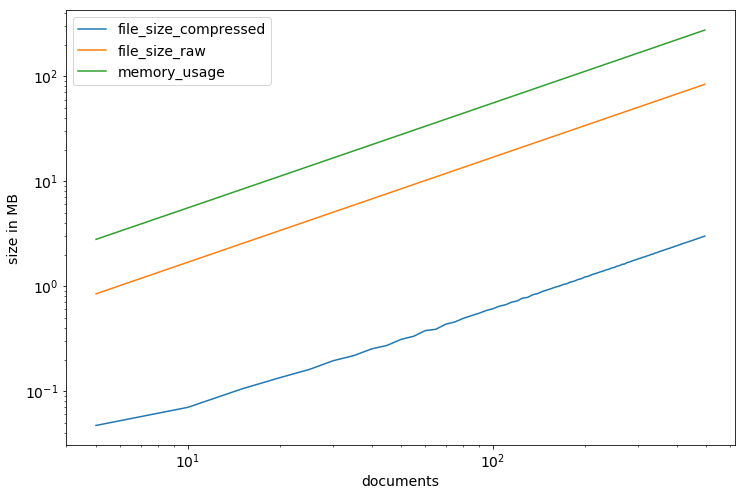

In [47]:
f = plt.figure(figsize=(12,8))
lines = [plt.loglog(data["entries"], data[col]/1e6, label=col) for col in data.columns if col != "entries" and "speed" not in col]
plt.legend(loc='best')
plt.ylabel("size in MB")
plt.xlabel("documents")
plt.savefig('file_sizes.pdf')

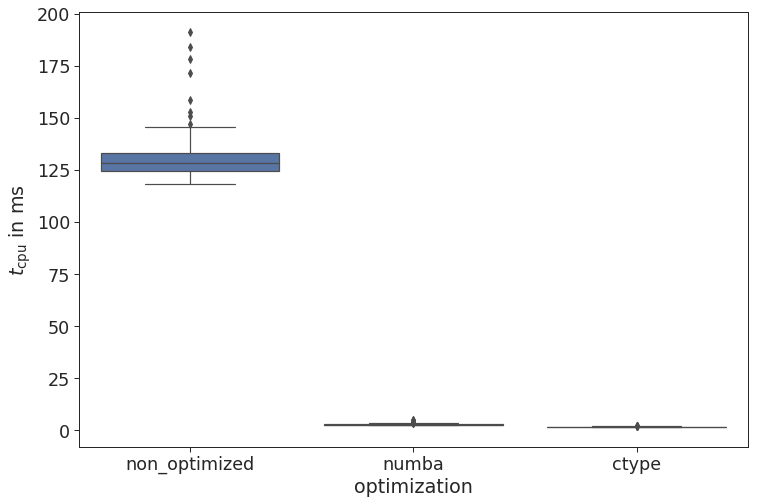

In [67]:
import seaborn as sns
sns.set(style="ticks")
sns.set_context("paper", font_scale=2)
data = pd.read_csv('kitis_speed_comp.csv', index_col=0)
f = plt.figure(figsize=(12,8))
sns.boxplot(data=data.iloc[1:]*1000)
#sns.despine(offset=10, trim=True)
plt.xlabel('optimization')
plt.ylabel('$t_\\mathrm{cpu}$ in ms')
plt.savefig('optimization_comparison.pdf')

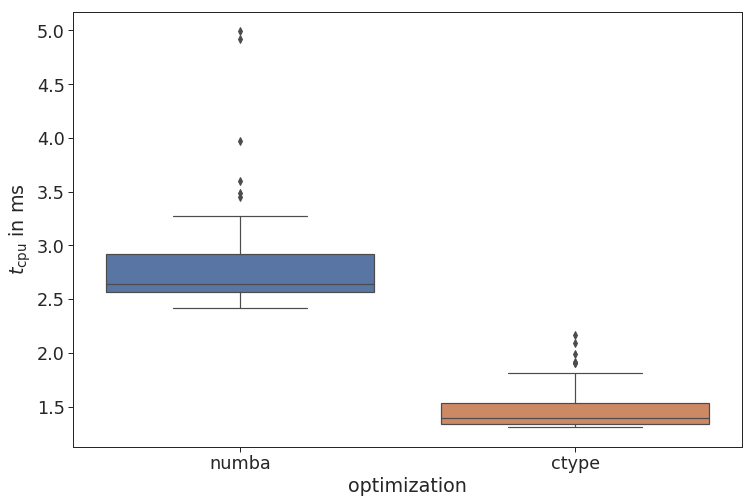

In [68]:
f = plt.figure(figsize=(12,8))
sns.boxplot(data=data[['numba','ctype']].iloc[1:]*1000)
#sns.despine(offset=10, trim=True)
plt.xlabel('optimization')
plt.ylabel('$t_\\mathrm{cpu}$ in ms')
plt.savefig('optimization_comparison_fast.pdf')

(0, 75.75)

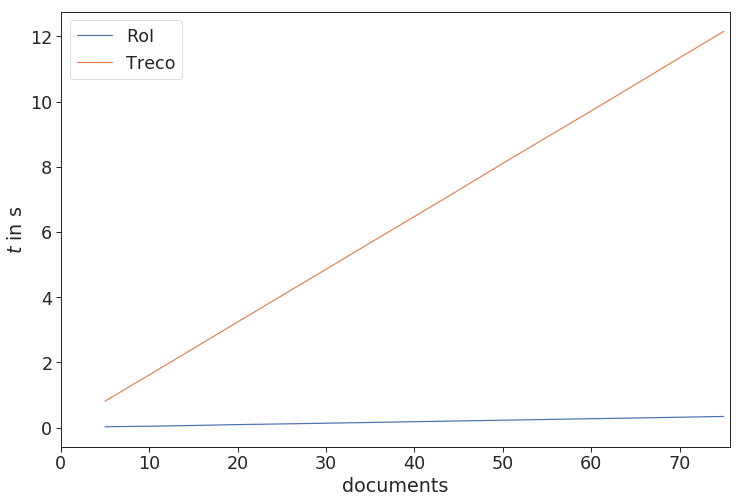

In [76]:
data = pd.read_csv('reco_speed_comp.csv', index_col=0)

f = plt.figure(figsize=(12,8))
lines = [plt.plot(data["entries"], data[col], label=col) for col in data.columns if col != "entries" ]
plt.legend(loc='best')
plt.ylabel("$t$ in s")
plt.xlabel("documents")
plt.xlim(0, data['entries'].max()+data['entries'].max()*0.01)
#plt.savefig('operation_speed.pdf')

Text(0.5, 0, 'documents')

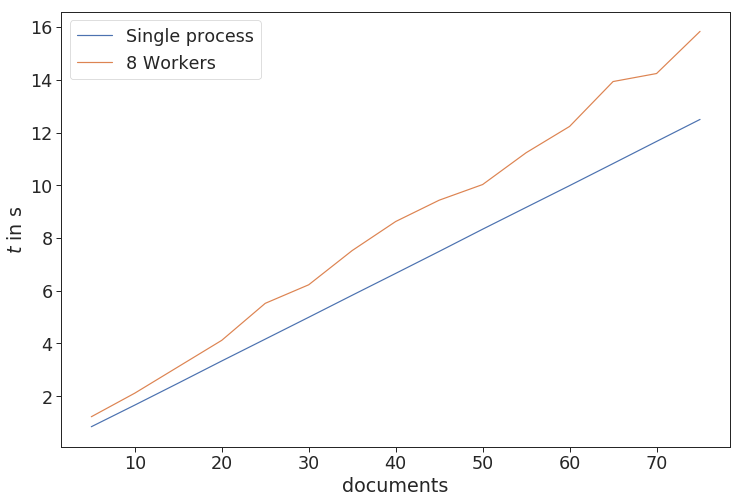

In [78]:
dataMulti = pd.read_csv('reco_multiprocess_comp.csv', index_col=0)

f = plt.figure(figsize=(12,8))
plt.plot(data["entries"], data['RoI']+data['Treco'], label="Single process")
plt.plot(dataMulti["entries"], dataMulti['multiprocess'], label="8 Workers")

plt.legend(loc='best')
plt.ylabel("$t$ in s")
plt.xlabel("documents")
#plt.xlim(0, data['entries'].max()+data['entries'].max()*0.01)
#plt.savefig('operation_speed.pdf')